In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Cleaning & Preprocessing

In [2]:
df = pd.read_csv(r"D:\FUCK!!\Selected Topics\Project\student-por.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [4]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
cat_cols = df.select_dtypes(include=['object']).columns

df_cat = df[cat_cols].copy()

print(df_cat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   address     649 non-null    object
 3   famsize     649 non-null    object
 4   Pstatus     649 non-null    object
 5   Mjob        649 non-null    object
 6   Fjob        649 non-null    object
 7   reason      649 non-null    object
 8   guardian    649 non-null    object
 9   schoolsup   649 non-null    object
 10  famsup      649 non-null    object
 11  paid        649 non-null    object
 12  activities  649 non-null    object
 13  nursery     649 non-null    object
 14  higher      649 non-null    object
 15  internet    649 non-null    object
 16  romantic    649 non-null    object
dtypes: object(17)
memory usage: 86.3+ KB
None


In [6]:
n_categories = df_cat.nunique()

cat_counts = pd.DataFrame({
    'column': n_categories.index,
    'n_categories': n_categories.values
}).reset_index(drop=True)

print(cat_counts)

        column  n_categories
0       school             2
1          sex             2
2      address             2
3      famsize             2
4      Pstatus             2
5         Mjob             5
6         Fjob             5
7       reason             4
8     guardian             3
9    schoolsup             2
10      famsup             2
11        paid             2
12  activities             2
13     nursery             2
14      higher             2
15    internet             2
16    romantic             2


In [ ]:
dfEncoded = df.copy()

encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    dfEncoded[col] = le.fit_transform(dfEncoded[col])
    encoders[col] = le  

print(dfEncoded.shape)
print(dfEncoded.head())

(649, 33)
   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         4   0  11  11  
1       5         3      3     1     1       3         2   9  11  11  
2       4         3      2     2     3       3         6  12  13  12  
3       3         2      2     1     1       5         0  14  14  14  
4       4         3      2     1     2       5         0  11  13  13  

[5 rows x 33 columns]


In [8]:
dfEncoded

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,4,15,15,16
646,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,1,5,6,11,12,9
647,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,6,10,10,10


In [9]:
columns_to_normalize = ['age', 'G1', 'G2', 'G3']

scaler = MinMaxScaler()

dfEncoded[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(dfEncoded[columns_to_normalize].head())

        age        G1        G2        G3
0  0.428571  0.000000  0.578947  0.578947
1  0.285714  0.473684  0.578947  0.578947
2  0.000000  0.631579  0.684211  0.631579
3  0.000000  0.736842  0.736842  0.736842
4  0.142857  0.578947  0.684211  0.684211


     age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
7     17     4     4           2          2         0       4         1   
18    17     3     2           1          1         3       5         5   
19    16     4     3           1          1         0       3         1   
25    16     2     2           1          1         0       1         2   
..   ...   ...   ...         ...        ...       ...     ...       ...   
639   19     1     1           2          1         1       4         3   
640   18     4     2           2          1         1       5         4   
644   19     2     3           1          3         1       5         4   
646   18     1     1           2          2         0       1         1   
647   17     3     1           2          1         0       2         4   

     goout  Dalc  Walc  health  absences  G1  G2  G3  
0        4     1     1       3         4   0

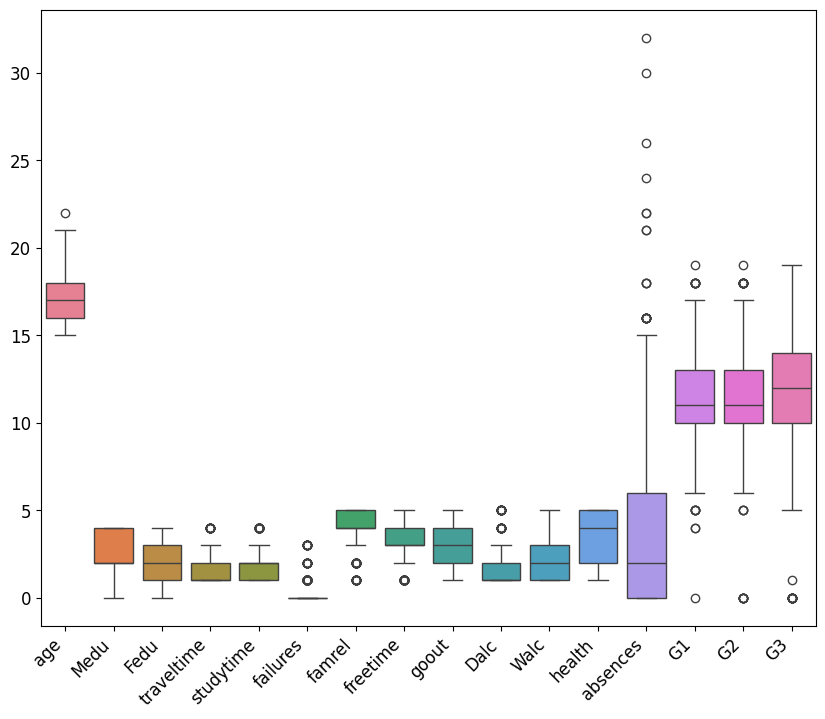

In [10]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])


Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1


outliers = numerical_df[((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)]


print(outliers)
plt.figure(figsize=(10, 8))
sns.boxplot(data=numerical_df)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

In [11]:
Q1_age = dfEncoded['absences'].quantile(0.25)
Q3_age = dfEncoded['absences'].quantile(0.75)
IQR_age = Q3_age - Q1_age

dfCleaned = dfEncoded[(dfEncoded['absences'] >= (Q1_age - 1.5 * IQR_age)) & (dfEncoded['absences'] <= (Q3_age + 1.5 * IQR_age))]

dfCleaned

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,0.428571,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0.000000,0.578947,0.578947
1,0,0,0.285714,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,0.473684,0.578947,0.578947
2,0,0,0.000000,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,0.631579,0.684211,0.631579
3,0,0,0.000000,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,0.736842,0.736842,0.736842
4,0,0,0.142857,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,0.578947,0.684211,0.684211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,0.571429,0,0,1,2,3,3,2,...,5,4,2,1,2,5,4,0.526316,0.578947,0.526316
645,1,0,0.428571,1,1,1,3,1,4,3,...,4,3,4,1,1,1,4,0.789474,0.789474,0.842105
646,1,0,0.428571,1,0,1,1,1,2,2,...,1,1,1,1,1,5,6,0.578947,0.631579,0.473684
647,1,1,0.285714,1,1,1,3,1,3,3,...,2,4,5,3,4,2,6,0.526316,0.526316,0.526316


In [12]:
dfEncoded['at_risk'] = (df['G3'] < 10).astype(int)

In [ ]:
drop_cols = ['G1','G2','G3']  
x = dfEncoded.drop(columns=drop_cols + ['at_risk'])
y = dfEncoded['at_risk']
x

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,0.428571,1,0,0,4,4,0,4,...,1,0,0,4,3,4,1,1,3,4
1,0,0,0.285714,1,0,1,1,1,0,2,...,1,1,0,5,3,3,1,1,3,2
2,0,0,0.000000,1,1,1,1,1,0,2,...,1,1,0,4,3,2,2,3,3,6
3,0,0,0.000000,1,0,1,4,2,1,3,...,1,1,1,3,2,2,1,1,5,0
4,0,0,0.142857,1,0,1,3,3,2,2,...,1,0,0,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,0.571429,0,0,1,2,3,3,2,...,1,1,0,5,4,2,1,2,5,4
645,1,0,0.428571,1,1,1,3,1,4,3,...,1,1,0,4,3,4,1,1,1,4
646,1,0,0.428571,1,0,1,1,1,2,2,...,1,0,0,1,1,1,1,1,5,6
647,1,1,0.285714,1,1,1,3,1,3,3,...,1,1,0,2,4,5,3,4,2,6


In [14]:
y.value_counts()

at_risk
0    549
1    100
Name: count, dtype: int64

In [15]:
dfCleaned['at_risk'] = (df['G3'] < 10).astype(int)

C:\Users\omarn\AppData\Local\Temp\ipykernel_29880\1931022616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCleaned['at_risk'] = (df['G3'] < 10).astype(int)


In [ ]:
drop_cols = ['G1','G2','G3']  
xCleaned = dfCleaned.drop(columns=drop_cols + ['at_risk'])
yCleaned = dfCleaned['at_risk']
xCleaned

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,0.428571,1,0,0,4,4,0,4,...,1,0,0,4,3,4,1,1,3,4
1,0,0,0.285714,1,0,1,1,1,0,2,...,1,1,0,5,3,3,1,1,3,2
2,0,0,0.000000,1,1,1,1,1,0,2,...,1,1,0,4,3,2,2,3,3,6
3,0,0,0.000000,1,0,1,4,2,1,3,...,1,1,1,3,2,2,1,1,5,0
4,0,0,0.142857,1,0,1,3,3,2,2,...,1,0,0,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,0.571429,0,0,1,2,3,3,2,...,1,1,0,5,4,2,1,2,5,4
645,1,0,0.428571,1,1,1,3,1,4,3,...,1,1,0,4,3,4,1,1,1,4
646,1,0,0.428571,1,0,1,1,1,2,2,...,1,0,0,1,1,1,1,1,5,6
647,1,1,0.285714,1,1,1,3,1,3,3,...,1,1,0,2,4,5,3,4,2,6


In [17]:
yCleaned.value_counts()

at_risk
0    533
1     95
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

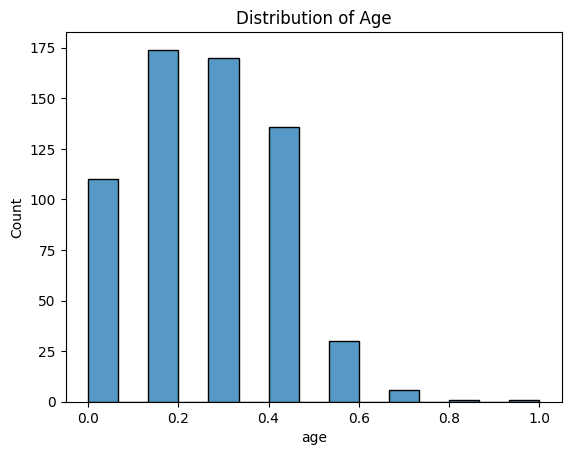

In [ ]:
sns.histplot(dfCleaned['age'], bins=15)
plt.title("Distribution of Age")
plt.show()

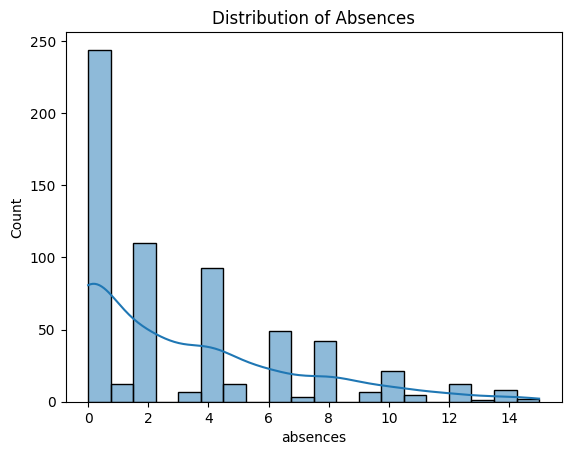

In [ ]:
sns.histplot(dfCleaned['absences'], bins=20, kde=True)
plt.title("Distribution of Absences")
plt.show()

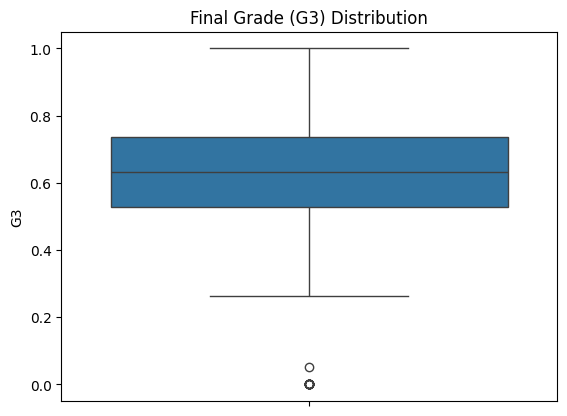

In [ ]:
sns.boxplot(y=dfCleaned['G3'])
plt.title("Final Grade (G3) Distribution")
plt.show()

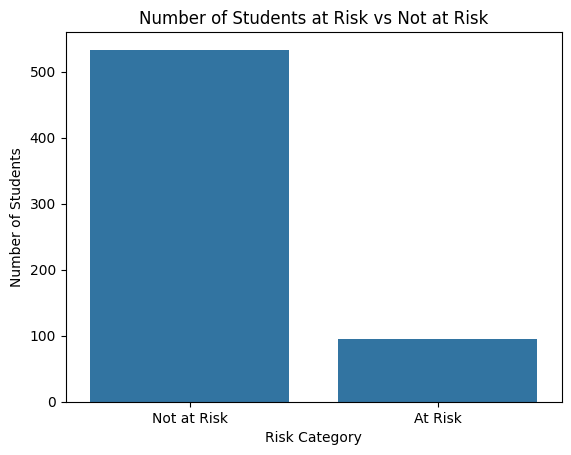

In [21]:
sns.countplot(x='at_risk', data=dfCleaned)
plt.title("Number of Students at Risk vs Not at Risk")
plt.xticks([0, 1], ['Not at Risk', 'At Risk'])
plt.ylabel("Number of Students")
plt.xlabel("Risk Category")
plt.show()

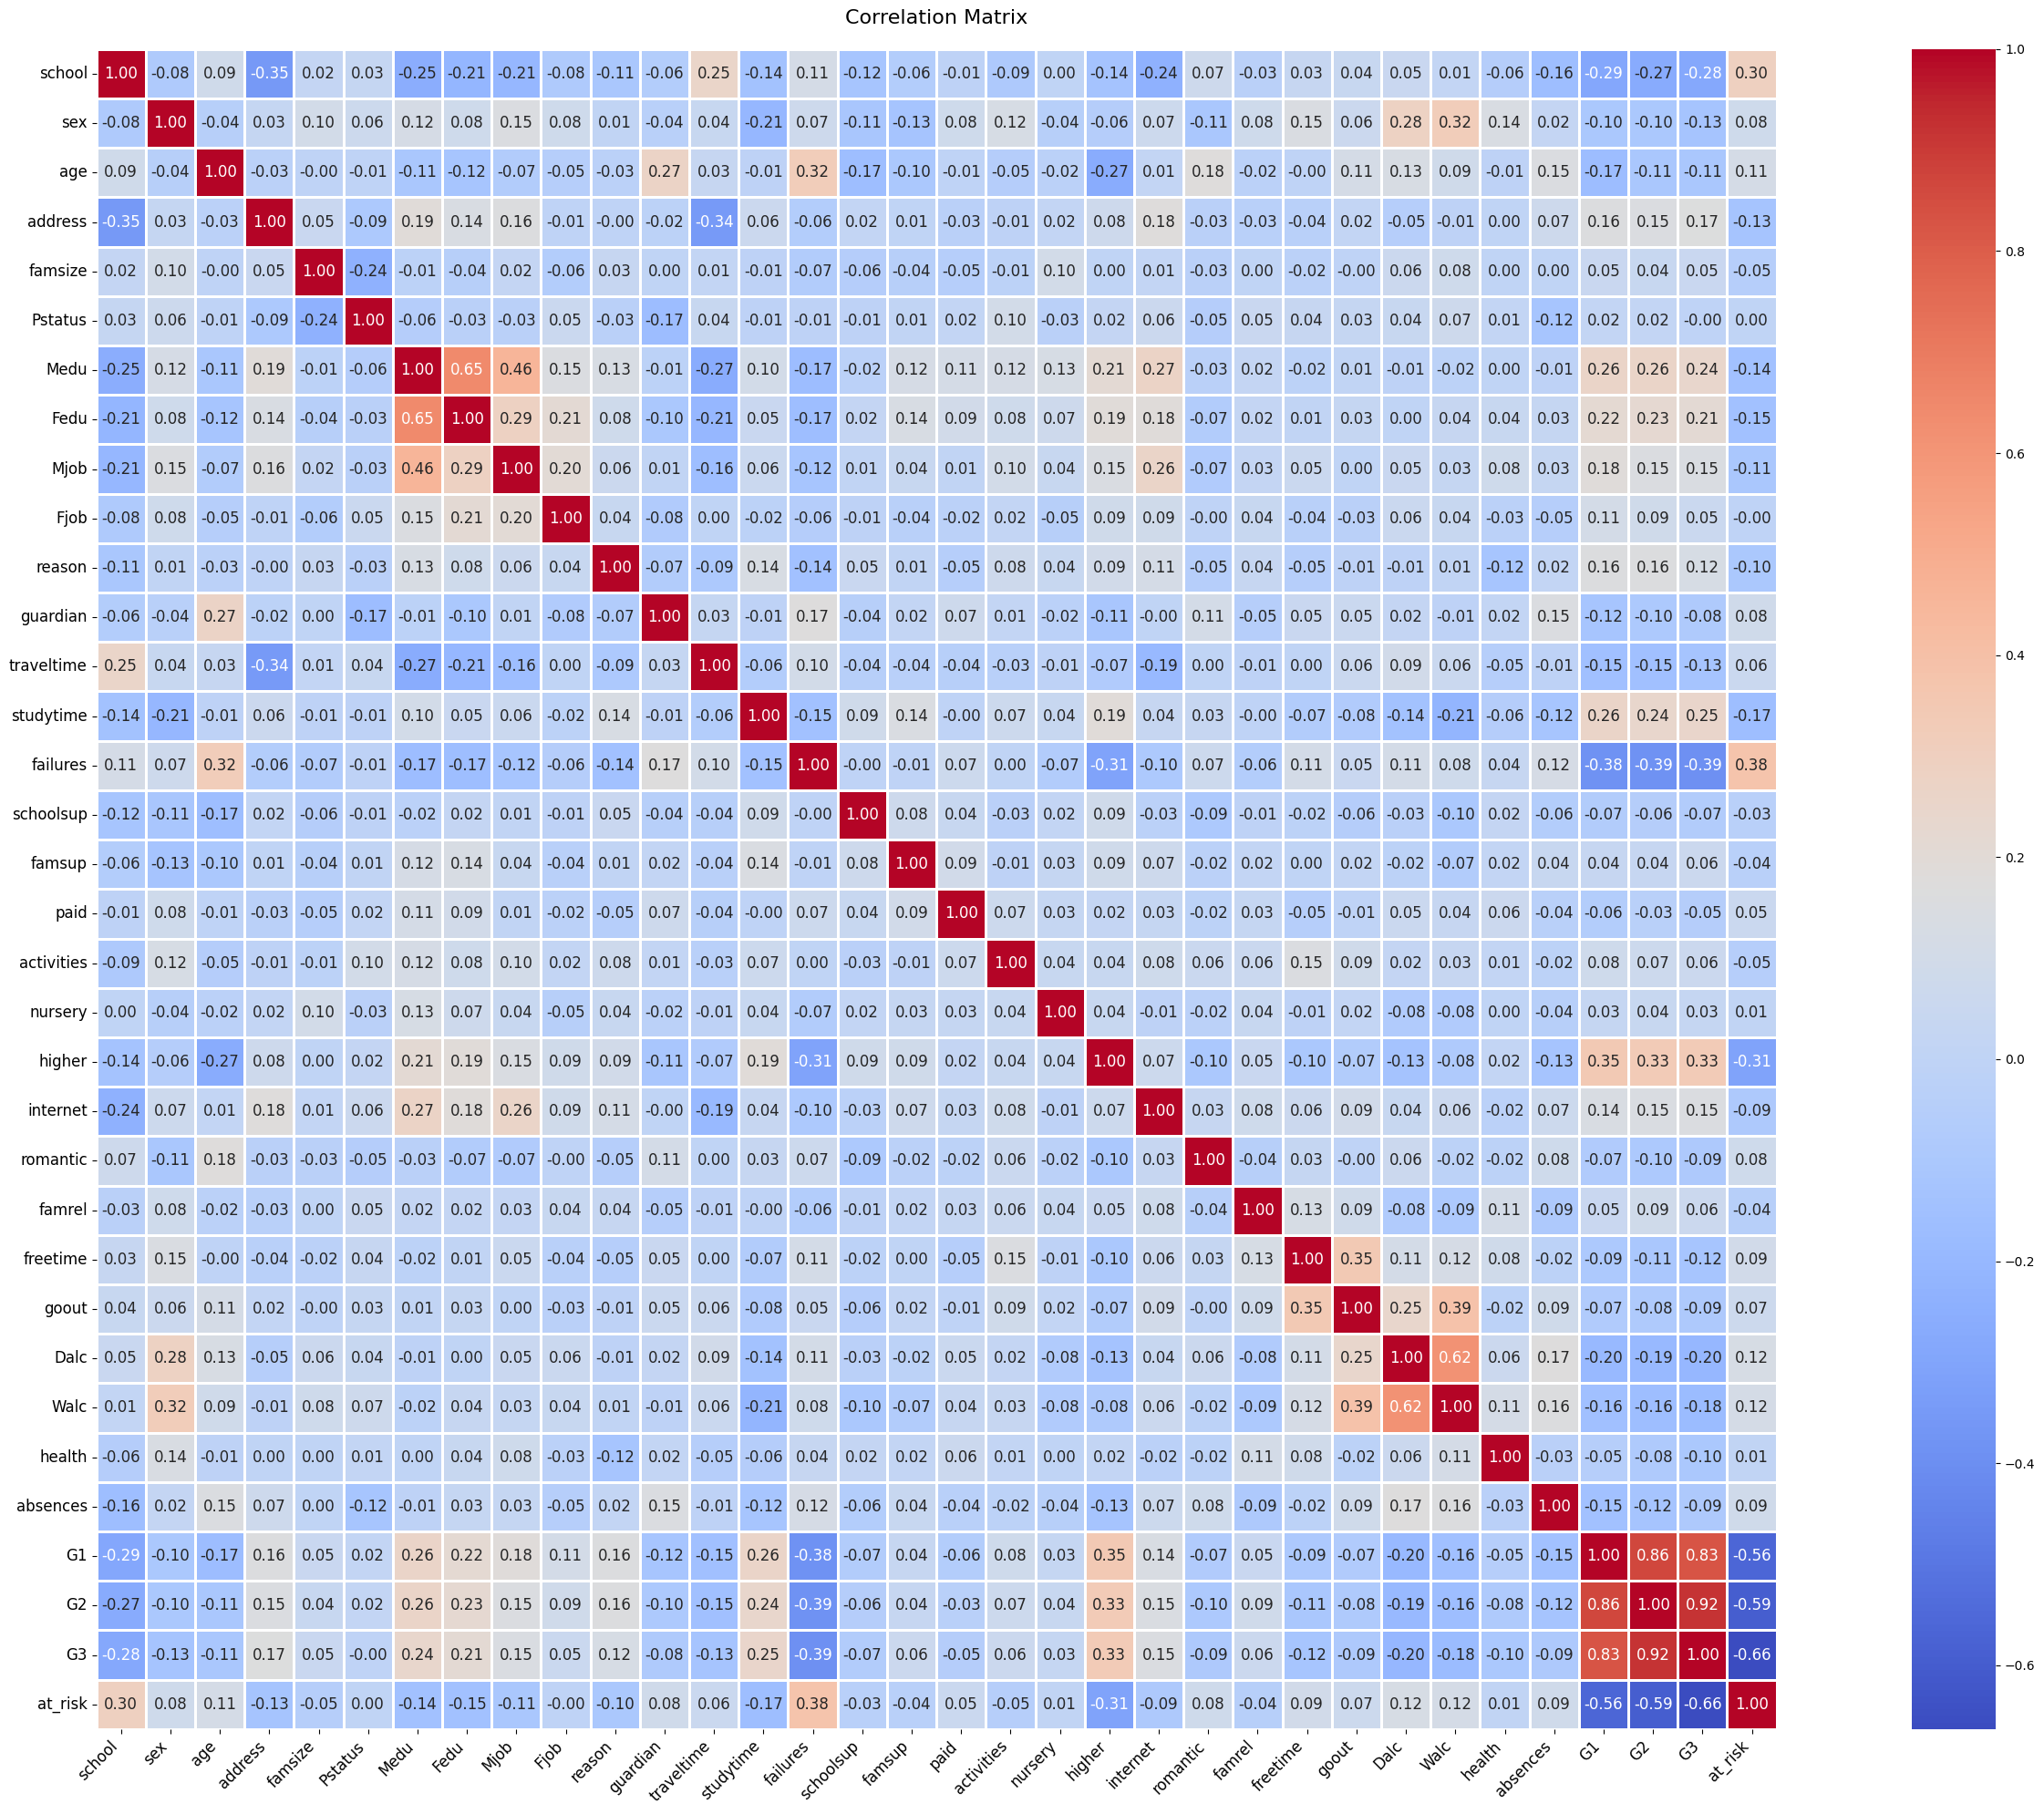

In [ ]:
corr = dfEncoded.select_dtypes(include=['int64','float64']).corr()

plt.figure(figsize=(30, 20))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=1.0,
    linecolor='white',
    square=True,
    annot_kws={"size":12},  
)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title("Correlation Matrix", pad=20, fontsize=16)

plt.tight_layout()
plt.show()


# Insight Extraction

In [ ]:
corr_with_G3 = dfEncoded.corr()['G3'].drop(['G3','G1','G2']).sort_values()

print(corr_with_G3.head(3))

at_risk    -0.663157
failures   -0.393316
school     -0.284294
Name: G3, dtype: float64


In [ ]:
def rule_based_risk(g3):
    if g3 < 0.5:
        return 'High Risk'
    elif g3 < 0.75:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

df['risk_rule'] = dfEncoded['G3'].apply(rule_based_risk)

In [ ]:
features = df[['G1', 'G2', 'G3']]

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster_id'] = kmeans.fit_predict(features)

centroids = pd.DataFrame(
    kmeans.cluster_centers_, 
    columns=['G1','G2','G3']
)
centroids['avg_G3'] = centroids['G3']

sorted_idx = centroids.sort_values('avg_G3').index.tolist()
risk_labels = { sorted_idx[0]: 'High Risk',
                sorted_idx[1]: 'Moderate Risk',
                sorted_idx[2]: 'Low Risk' }

df['risk_cluster'] = df['cluster_id'].map(risk_labels)

In [ ]:
print(df[['G1','G2','G3','risk_rule','risk_cluster']].head(10))

   G1  G2  G3      risk_rule   risk_cluster
0   0  11  11  Moderate Risk      High Risk
1   9  11  11  Moderate Risk      High Risk
2  12  13  12  Moderate Risk  Moderate Risk
3  14  14  14  Moderate Risk       Low Risk
4  11  13  13  Moderate Risk  Moderate Risk
5  12  12  13  Moderate Risk  Moderate Risk
6  13  12  13  Moderate Risk  Moderate Risk
7  10  13  13  Moderate Risk  Moderate Risk
8  15  16  17       Low Risk       Low Risk
9  12  12  13  Moderate Risk  Moderate Risk


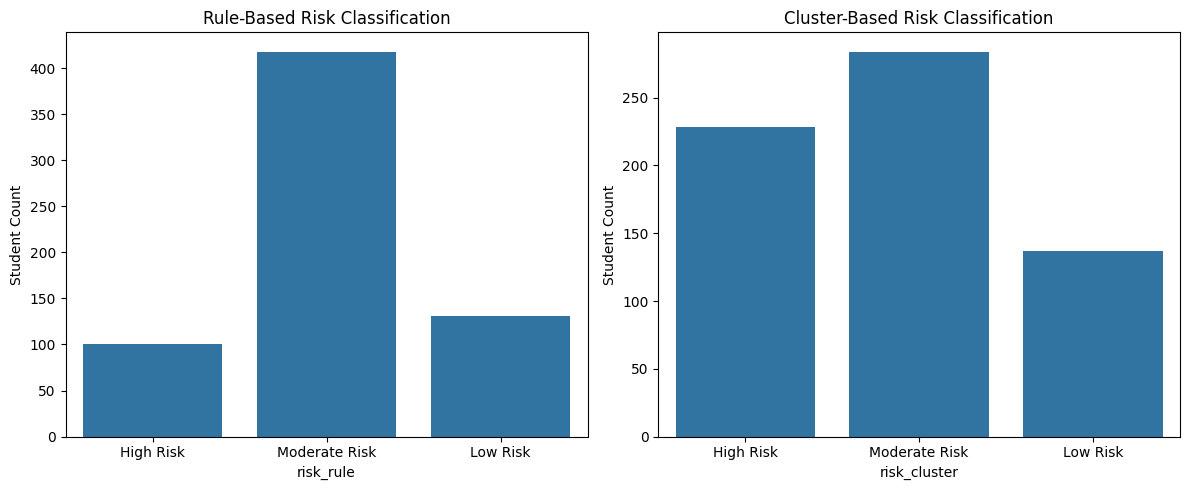

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df, x='risk_rule', ax=axes[0], order=['High Risk', 'Moderate Risk', 'Low Risk'])
axes[0].set_title("Rule-Based Risk Classification")
axes[0].set_ylabel("Student Count")

sns.countplot(data=df, x='risk_cluster', ax=axes[1], order=['High Risk', 'Moderate Risk', 'Low Risk'])
axes[1].set_title("Cluster-Based Risk Classification")
axes[1].set_ylabel("Student Count")

plt.tight_layout()
plt.show()

In [27]:
dfEncoded

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,at_risk
0,0,0,0.428571,1,0,0,4,4,0,4,...,3,4,1,1,3,4,0.000000,0.578947,0.578947,0
1,0,0,0.285714,1,0,1,1,1,0,2,...,3,3,1,1,3,2,0.473684,0.578947,0.578947,0
2,0,0,0.000000,1,1,1,1,1,0,2,...,3,2,2,3,3,6,0.631579,0.684211,0.631579,0
3,0,0,0.000000,1,0,1,4,2,1,3,...,2,2,1,1,5,0,0.736842,0.736842,0.736842,0
4,0,0,0.142857,1,0,1,3,3,2,2,...,3,2,1,2,5,0,0.578947,0.684211,0.684211,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,0.571429,0,0,1,2,3,3,2,...,4,2,1,2,5,4,0.526316,0.578947,0.526316,0
645,1,0,0.428571,1,1,1,3,1,4,3,...,3,4,1,1,1,4,0.789474,0.789474,0.842105,0
646,1,0,0.428571,1,0,1,1,1,2,2,...,1,1,1,1,5,6,0.578947,0.631579,0.473684,1
647,1,1,0.285714,1,1,1,3,1,3,3,...,4,5,3,4,2,6,0.526316,0.526316,0.526316,0


# Model Building

### Before Preprocessing

In [28]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [29]:
paramGridLR = [
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 2.5, 5, 10, 100],
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
        'max_iter': [100, 250, 500, 750, 1000],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': ['l1'],
        'C': [0.01, 0.1, 1, 2.5, 5, 10, 100],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 150, 250, 500, 750, 1000],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1, 2.5, 5, 10, 100],
        'solver': ['saga'],
        'l1_ratio': [0.1, 0.5, 0.9, 1.2, 1.5],
        'max_iter': [100, 250, 500, 750, 1000],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': [None],
        'solver': ['lbfgs', 'newton-cg', 'saga'],
        'max_iter': [100, 250, 500, 750, 1000],
        'class_weight': [None, 'balanced']
    }
]

In [30]:
modelLR = LogisticRegression()

In [31]:
grid = GridSearchCV(estimator=modelLR, param_grid=paramGridLR, scoring='f1', cv=20, n_jobs=-1, verbose=1)

In [32]:
grid.fit(xTrain, yTrain)

Fitting 20 folds for each of 828 candidates, totalling 16560 fits


c:\Users\omarn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2800 fits failed out of a total of 16560.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\omarn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\omarn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\omarn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

GridSearchCV(cv=20, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 2.5, 5, 10, 100],
                          'class_weight': [None, 'balanced'],
                          'max_iter': [100, 250, 500, 750, 1000],
                          'penalty': ['l2'],
                          'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                     'saga']},
                         {'C': [0.01, 0.1, 1, 2.5, 5, 10, 100],
                          'class_weight': [None, 'balanced'],
                          'max_iter': [100, 150, 250, 500, 750, 1000],
                          'penalty':...ver': ['liblinear', 'saga']},
                         {'C': [0.01, 0.1, 1, 2.5, 5, 10, 100],
                          'class_weight': [None, 'balanced'],
                          'l1_ratio': [0.1, 0.5, 0.9, 1.2, 1.5],
                          'max_iter': [100, 250, 500, 750, 1000],
                          'penalty': ['elasticnet'], 'solver': ['saga']},
                         {'class_weight': [None, 'balanced'],
                          'max_iter': [100, 250, 500, 750, 1000],
                          'penalty': [None],
                          'solver': ['lbfgs', 'newton-cg', 'saga']}],
             scoring='f1', verbose=1)

In [33]:
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'l1_ratio': 0.9, 'max_iter': 250, 'penalty': 'elasticnet', 'solver': 'saga'}
Best CV Accuracy: 0.5657323232323231


In [34]:
best_dt = grid.best_estimator_
yPredLR = best_dt.predict(xTest)

In [35]:
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(yTest, yPredLR))
print("Confusion Matrix:\n", confusion_matrix(yTest, yPredLR))
print(classification_report(yTest, yPredLR))

=== Logistic Regression ===
Accuracy: 0.7730061349693251
Confusion Matrix:
 [[111  27]
 [ 10  15]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       138
           1       0.36      0.60      0.45        25

    accuracy                           0.77       163
   macro avg       0.64      0.70      0.65       163
weighted avg       0.83      0.77      0.79       163



In [ ]:
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dt, param_grid, cv=100, scoring='accuracy', n_jobs=-1, verbose=1)

grid.fit(xTrain, yTrain)

c:\Users\omarn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 75 members, which is less than n_splits=100.
  warnings.warn(


Fitting 100 folds for each of 180 candidates, totalling 18000 fits


GridSearchCV(cv=100, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [ ]:
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8490000000000001


In [39]:
best_dt = grid.best_estimator_
yPred = best_dt.predict(xTest)

print("\n=== Decision Tree Performance on Test Set ===")
print("Test Accuracy:", accuracy_score(yTest, yPred))
print("Confusion Matrix:\n", confusion_matrix(yTest, yPred))
print(classification_report(yTest, yPred))


=== Decision Tree Performance on Test Set ===
Test Accuracy: 0.8220858895705522
Confusion Matrix:
 [[123  15]
 [ 14  11]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       138
           1       0.42      0.44      0.43        25

    accuracy                           0.82       163
   macro avg       0.66      0.67      0.66       163
weighted avg       0.82      0.82      0.82       163



In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],            
    'max_depth': [5, 10, 15, None],            
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4],             
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced'],
}

In [ ]:
rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=30, scoring='accuracy', n_jobs=-1, verbose=1)

In [ ]:
grid.fit(xTrain, yTrain)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

Fitting 30 folds for each of 576 candidates, totalling 17280 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.871078431372549


In [ ]:
best_rf = grid.best_estimator_
y_pred = best_rf.predict(xTest)

print("\n=== Random Forest Performance on Test Set ===")
print("Test Accuracy:", accuracy_score(yTest, yPred))
print("Confusion Matrix:\n", confusion_matrix(yTest, yPred))
print(classification_report(yTest, yPred))


=== Random Forest Performance on Test Set ===
Test Accuracy: 0.8220858895705522
Confusion Matrix:
 [[123  15]
 [ 14  11]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       138
           1       0.42      0.44      0.43        25

    accuracy                           0.82       163
   macro avg       0.66      0.67      0.66       163
weighted avg       0.82      0.82      0.82       163



### After Preprocessing

In [47]:
xTrain, xTest, yTrain, yTest = train_test_split(xCleaned, yCleaned, test_size=0.25, random_state=42)

In [48]:
paramGridLR = [
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 2.5, 5, 10, 100],
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
        'max_iter': [100, 250, 500, 750, 1000],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': ['l1'],
        'C': [0.01, 0.1, 1, 2.5, 5, 10, 100],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 150, 250, 500, 750, 1000],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1, 2.5, 5, 10, 100],
        'solver': ['saga'],
        'l1_ratio': [0.1, 0.5, 0.9, 1.2, 1.5],
        'max_iter': [100, 250, 500, 750, 1000],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': [None],
        'solver': ['lbfgs', 'newton-cg', 'saga'],
        'max_iter': [100, 250, 500, 750, 1000],
        'class_weight': [None, 'balanced']
    }
]

In [49]:
modelLR = LogisticRegression()

grid = GridSearchCV(estimator=modelLR, param_grid=paramGridLR, scoring='f1', cv=20, n_jobs=-1, verbose=1)

In [50]:
grid.fit(xTrain, yTrain)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Fitting 20 folds for each of 828 candidates, totalling 16560 fits
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'l1_ratio': 0.1, 'max_iter': 250, 'penalty': 'elasticnet', 'solver': 'saga'}
Best CV Accuracy: 0.5724636474636475


c:\Users\omarn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2800 fits failed out of a total of 16560.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\omarn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\omarn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\omarn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

In [51]:
best_dt = grid.best_estimator_
yPredLR = best_dt.predict(xTest)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(yTest, yPredLR))
print("Confusion Matrix:\n", confusion_matrix(yTest, yPredLR))
print(classification_report(yTest, yPredLR))

=== Logistic Regression ===
Accuracy: 0.7579617834394905
Confusion Matrix:
 [[105  33]
 [  5  14]]
              precision    recall  f1-score   support

           0       0.95      0.76      0.85       138
           1       0.30      0.74      0.42        19

    accuracy                           0.76       157
   macro avg       0.63      0.75      0.64       157
weighted avg       0.88      0.76      0.80       157



In [ ]:
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dt, param_grid, cv=100, scoring='accuracy', n_jobs=-1, verbose=1)

grid.fit(xTrain, yTrain)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

c:\Users\omarn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 76 members, which is less than n_splits=100.
  warnings.warn(


Fitting 100 folds for each of 180 candidates, totalling 18000 fits
Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8669999999999999


In [54]:
best_dt = grid.best_estimator_
yPred = best_dt.predict(xTest)

print("\n=== Decision Tree Performance on Test Set ===")
print("Test Accuracy:", accuracy_score(yTest, yPred))
print("Confusion Matrix:\n", confusion_matrix(yTest, yPred))
print(classification_report(yTest, yPred))


=== Decision Tree Performance on Test Set ===
Test Accuracy: 0.8726114649681529
Confusion Matrix:
 [[129   9]
 [ 11   8]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       138
           1       0.47      0.42      0.44        19

    accuracy                           0.87       157
   macro avg       0.70      0.68      0.69       157
weighted avg       0.87      0.87      0.87       157



In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],            
    'max_depth': [5, 10, 15, None],            
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4],             
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced'],
}

In [ ]:
rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=30, scoring='accuracy', n_jobs=-1, verbose=1)

In [ ]:
grid.fit(xTrain, yTrain)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

Fitting 30 folds for each of 576 candidates, totalling 17280 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}
Best Cross-Validation Accuracy: 0.8640277777777778


In [ ]:
best_rf = grid.best_estimator_
y_pred = best_rf.predict(xTest)

print("\n=== Random Forest Performance on Test Set ===")
print("Test Accuracy:", accuracy_score(yTest, yPred))
print("Confusion Matrix:\n", confusion_matrix(yTest, yPred))
print(classification_report(yTest, yPred))


=== Random Forest Performance on Test Set ===
Test Accuracy: 0.8726114649681529
Confusion Matrix:
 [[129   9]
 [ 11   8]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       138
           1       0.47      0.42      0.44        19

    accuracy                           0.87       157
   macro avg       0.70      0.68      0.69       157
weighted avg       0.87      0.87      0.87       157

